In [3]:
#---------------------------------------------------------------------------------
# https://github.com/open-mmlab/mmrotate/blob/main/demo/MMRotate_Tutorial.ipynb
#---------------------------------------------------------------------------------

In [2]:
import mmcv
import mmrotate
import mmdet
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
# Check mmcv installation
print(mmcv.__version__) #noqa E1101
# Check MMRotate installation
print(mmrotate.__version__)
print(mmrotate.__file__)
# Check MMDetection installation
print(mmdet.__version__)

print(get_compiling_cuda_version())
print(get_compiler_version())

2.0.0
1.0.0rc1
/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/01.SAMRS_MTP/MTP/MMRotate_1_x/mmrotate/mmrotate/__init__.py
3.1.0
11.1
GCC 7.3


In [4]:
import mmengine
print(mmengine.__version__)

0.10.3


In [5]:
# # We use mim to download the pre-trained checkpoints for inference and finetuning.
# !mim download mmrotate --config rotated_rtmdet_tiny-3x-dota --dest .
# !mim download mmrotate --config rotated_rtmdet_l-3x-dota --dest .

In [6]:
from mmengine.config import Config
from mmengine.runner import Runner

from mmdet.utils import register_all_modules as register_all_modules_mmdet
from mmdet.apis import inference_detector, init_detector

from mmrotate.registry import VISUALIZERS
from mmrotate.utils import register_all_modules

In [7]:
# register all modules in mmdet into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules_mmdet(init_default_scope=False)
register_all_modules(init_default_scope=False)

# Choose to use a config and initialize the detector
config = '/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/01.SAMRS_MTP/MTP/MMRotate_1_x/work_dir/oriented_rcnn_rvsa_l_1024_mae_mtp_dota10_adjust_v1.py'
# Setup a checkpoint file to load
# 9 epoch => recall : 0.92, ap : 0.838 
checkpoint = '/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/01.SAMRS_MTP/MTP/MMRotate_1_x/work_dir/epoch_9.pth'
# Set work_dir
work_dir = '/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/01.SAMRS_MTP/MTP/MMRotate_1_x/work_dir'
# Set the device to be used for evaluation
device='cuda:0'
# Set inference path
img = './07.jpg'

cfg = Config.fromfile(config)
cfg.load_from = checkpoint
cfg.work_dir = work_dir

# register all modules in mmrotate into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(cfg, checkpoint, palette="dota", device=device)
model

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
The relative_pos_embedding is used
Loads checkpoint by local backend from path: /mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/01.SAMRS_MTP/MTP/MMRotate_1_x/work_dir/epoch_9.pth


FasterRCNN(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): RVSA_MTP_branches(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): RotatedVariedSizeWindowAttention(
          (sampling_offsets): Sequential(
            (0): AvgPool2d(kernel_size=7, stride=7, padding=0)
            (1): LeakyReLU(negative_slope=0.01)
            (2): Conv2d(1024, 32, kernel_size=(1, 1), stride=(1, 1))
          )
          (sampling_scales): Sequential(
            (0): AvgPool2d(kernel_size=7, stride=7, padding=0)
            (1): LeakyReLU(negative_slope=0.01)
            (2): Conv2d(1024, 32, kernel_size=(1, 1), stride=(1, 1))
          )
          (sampling_angles): Sequential(
            (0): AvgPool2d(kernel_size=7, stride=7, padding=0)
            (1): Leak

In [8]:
model.cfg.visualizer

{'name': 'visualizer',
 'type': 'RotLocalVisualizer',
 'vis_backends': [{'type': 'LocalVisBackend'}]}

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmrotate.visualization.local_visualizer.RotLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/visualization/palette.py:90: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a,

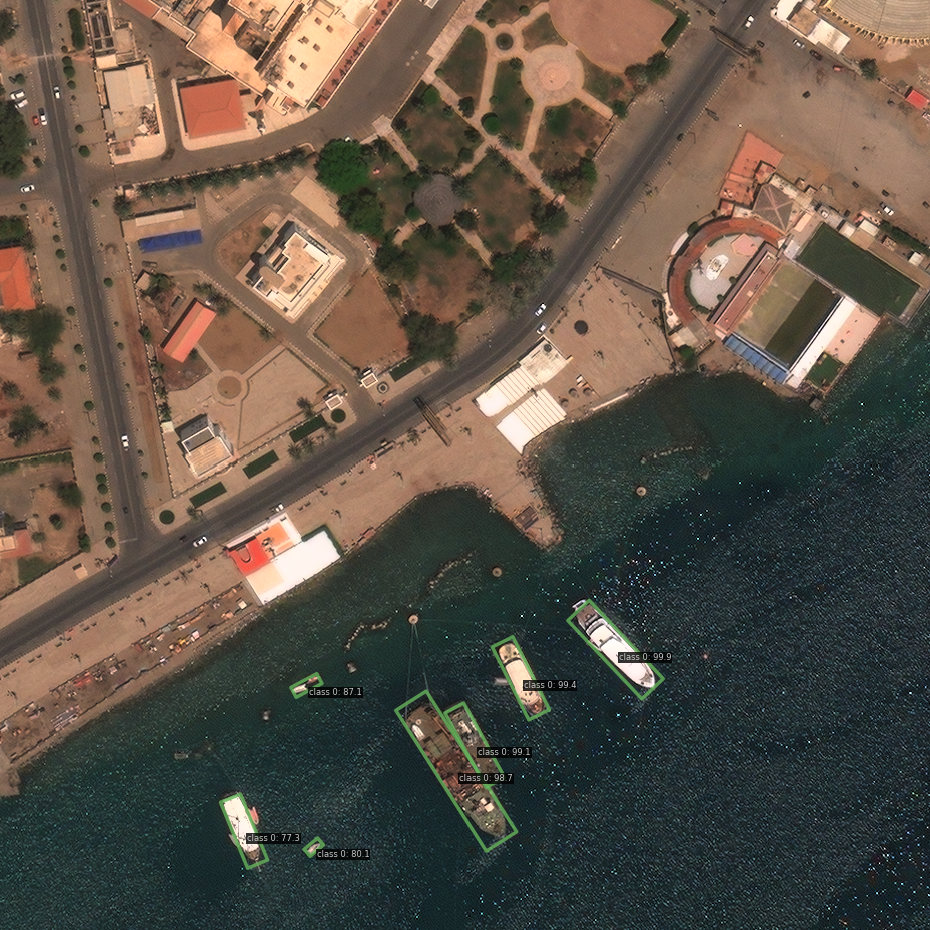

In [14]:
# Use the detector to do inference
from PIL import Image
img = '/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/01.SAMRS_MTP/MTP/MMRotate_1_x/demo_/18__1840_1840.png'
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')
result = inference_detector(model, img)

visualizer = VISUALIZERS.build(model.cfg.visualizer)
# show the results

visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True,
    wait_time=0,
    pred_score_thr=0.5)
visualizer.show()
img_ = visualizer.get_image()
img_ = Image.fromarray(img_, 'RGB')
img_.save("./demo_/ship_sample_1.png")

img_